TAREA N°1 ANÁLISIS DE DATOS

JUAN CRISTÓBAL VARAS TOMASELLO;
GEOLOGÍA UNIVERSIDAD DEL DESARROLLO;
11-10-2021

1. Mostrar y explicar, en 16 gráficos (uno por región), como fue la evolución de la cuarentena (por día)
2. Qué dia hubo la mayor cantidad de personas en cuarentena en cada región
3. Qué día hubo la mayor cantidad de personas en cuarentena en el país

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline
# importar bases de datos

In [2]:
df1 = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true', sep=',')
# poblacion por comuna

In [3]:
df2 = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/input/Paso_a_paso/paso_a_paso.csv?raw=true', sep=',')
# paso a paso, fases

In [4]:
pob=df1[['Region','Codigo region','Comuna','Codigo comuna','Poblacion']] 
pob=pob.dropna()
pob.head()
# de la tabla de covid19, solo nos interesan los campos region, codigo region, comuna, codigo comuna y POBLACION

,Region,Codigo region,Comuna,Codigo comuna,Poblacion
0,Arica y Parinacota,15,Arica,15101.0,247552.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0
5,Tarapacá,1,Alto Hospicio,1107.0,129999.0


In [5]:
pob['Poblacion']=pob['Poblacion'].astype(int)
pob['Codigo comuna']=pob['Codigo comuna'].astype(int)
# tanto poblacion como codigo comuna son valores float, por lo que deben ser convertidos a integer

In [6]:
pasos=df2.melt(id_vars=["codigo_region","region_residencia","codigo_comuna","comuna_residencia","zona"], var_name="fecha", value_name="paso")
pasos1=pasos[(pasos['paso']==1)] 
pasos1
# lo que se busca es que las fechas se ordenen por filas, y que solo se tengan en cuenta cuando hubo cuarentena (fase 1)

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,fecha,paso
1,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-28,1
5,1,Tarapacá,1107,Alto Hospicio,Total,2020-07-28,1
9,1,Tarapacá,1101,Iquique,Total,2020-07-28,1
12,1,Tarapacá,1401,Pozo Almonte,Urbana,2020-07-28,1
14,2,Antofagasta,2101,Antofagasta,Urbana,2020-07-28,1
...,...,...,...,...,...,...,...
148151,14,Los Ríos,14108,Panguipulli,Urbana,2021-08-15,1
148536,14,Los Ríos,14108,Panguipulli,Rural,2021-08-16,1
148537,14,Los Ríos,14108,Panguipulli,Urbana,2021-08-16,1
148922,14,Los Ríos,14108,Panguipulli,Rural,2021-08-17,1


In [7]:
pasos1=pasos1.rename(columns={'codigo_comuna':'Codigo comuna'})
# el objetivo es cambiar el nombre del codigo para hacer link con otra tabla de datos

In [8]:
paspob=pob.merge(pasos1, on='Codigo comuna') 
paspobr=pob.merge(pasos1, on='Codigo comuna')
# union de las tablas

In [9]:
paspob

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,codigo_region,region_residencia,comuna_residencia,zona,fecha,paso
0,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-28,1
1,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-29,1
2,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-30,1
3,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-31,1
4,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-08-01,1
...,...,...,...,...,...,...,...,...,...,...,...
31207,Magallanes,12,Punta Arenas,12101,141984,12,Magallanes,Punta Arenas,Total,2021-05-26,1
31208,Magallanes,12,Punta Arenas,12101,141984,12,Magallanes,Punta Arenas,Total,2021-05-27,1
31209,Magallanes,12,Punta Arenas,12101,141984,12,Magallanes,Punta Arenas,Total,2021-05-28,1
31210,Magallanes,12,Punta Arenas,12101,141984,12,Magallanes,Punta Arenas,Total,2021-05-29,1


In [10]:
cambio2 = (paspob['paso'] == 2)
paspob['Poblacion'][cambio2] = 0
cambio3 = (paspob['paso'] == 3)
paspob['Poblacion'][cambio3] = 0
cambio4 = (paspob['paso'] == 4)
paspob['Poblacion'][cambio4] = 0
cambio5 = (paspob['paso'] == 5)
paspob['Poblacion'][cambio5] = 0
paspob 
# contabiliza los dias que existen entre fechas de pandemia, de otro modo al hacer el grafico,
# mostraria lineas rectas entre fechas con cuerentena y no tomaria en cuenta los valles sin cuarentena

<ipython-input-10-4c6515310eb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paspob['Poblacion'][cambio2] = 0
<ipython-input-10-4c6515310eb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paspob['Poblacion'][cambio3] = 0
<ipython-input-10-4c6515310eb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paspob['Poblacion'][cambio4] = 0
<ipython-input-10-4c6515310eb7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,codigo_region,region_residencia,comuna_residencia,zona,fecha,paso
0,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-28,1
1,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-29,1
2,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-30,1
3,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-31,1
4,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-08-01,1
...,...,...,...,...,...,...,...,...,...,...,...
31207,Magallanes,12,Punta Arenas,12101,141984,12,Magallanes,Punta Arenas,Total,2021-05-26,1
31208,Magallanes,12,Punta Arenas,12101,141984,12,Magallanes,Punta Arenas,Total,2021-05-27,1
31209,Magallanes,12,Punta Arenas,12101,141984,12,Magallanes,Punta Arenas,Total,2021-05-28,1
31210,Magallanes,12,Punta Arenas,12101,141984,12,Magallanes,Punta Arenas,Total,2021-05-29,1


In [11]:
cambior2 = (paspobr['paso'] == 2)
paspobr['Poblacion'][cambior2] = 0
cambior3 = (paspobr['paso'] == 3)
paspobr['Poblacion'][cambior3] = 0
cambior4 = (paspobr['paso'] == 4)
paspobr['Poblacion'][cambior4] = 0
cambior5 = (paspobr['paso'] == 5)
paspobr['Poblacion'][cambior5] = 0
# toma valores de poblacion 0 cuando las fases sean distintas a cuarentena

<ipython-input-11-e908d73bab1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paspobr['Poblacion'][cambior2] = 0
<ipython-input-11-e908d73bab1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paspobr['Poblacion'][cambior3] = 0
<ipython-input-11-e908d73bab1f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paspobr['Poblacion'][cambior4] = 0
<ipython-input-11-e908d73bab1f>:8: SettingWithCopyWarning: 
A value is trying to be set on 

In [12]:
paspob=paspob.sort_values(by='fecha', ascending=True)  
paspob
# orden de las fechas de mas antigua a mas actual

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,codigo_region,region_residencia,comuna_residencia,zona,fecha,paso
0,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-28,1
5395,Metropolitana,13,Cerro Navia,13103,142465,13,Metropolitana,Cerro Navia,Total,2020-07-28,1
3643,Valparaíso,5,Los Andes,5301,68093,5,Valparaíso,Los Andes,Total,2020-07-28,1
832,Antofagasta,2,Antofagasta,2101,425725,2,Antofagasta,Antofagasta,Urbana,2020-07-28,1
7727,Metropolitana,13,Lo Prado,13117,104403,13,Metropolitana,Lo Prado,Total,2020-07-28,1
...,...,...,...,...,...,...,...,...,...,...,...
26841,Los Ríos,14,Panguipulli,14108,35991,14,Los Ríos,Panguipulli,Rural,2021-08-15,1
26843,Los Ríos,14,Panguipulli,14108,35991,14,Los Ríos,Panguipulli,Rural,2021-08-16,1
26844,Los Ríos,14,Panguipulli,14108,35991,14,Los Ríos,Panguipulli,Urbana,2021-08-16,1
26845,Los Ríos,14,Panguipulli,14108,35991,14,Los Ríos,Panguipulli,Rural,2021-08-17,1


In [ ]:
# Como se desconoce como se distribuye la poblacion en las distintas regiones del pais (fechas donde se toma el area rural y/o urbana y/o total),
# se estima que las fechas donde aparece rural y urbana la poblacion se duplicara.

In [13]:
paspob.drop('paso', axis=1, inplace=True)
paspob.drop('Comuna', axis=1, inplace=True)
paspob.drop('Codigo comuna', axis=1, inplace=True)
paspob.drop('codigo_region', axis=1, inplace=True)
paspob.drop('Codigo region', axis=1, inplace=True)
# lo que se pretende es que el programa sume las poblaciones por comuna cuando estan en cuarentena, no que sume los otros parametros

In [14]:
paspobr.drop('paso', axis=1, inplace=True)
paspobr.drop('Comuna', axis=1, inplace=True)
paspobr.drop('Codigo comuna', axis=1, inplace=True)
paspobr.drop('Region', axis=1, inplace=True)
paspobr.drop('Codigo region', axis=1, inplace=True)
paspobr.drop('zona', axis=1, inplace=True)
paspobr.drop('comuna_residencia', axis=1, inplace=True)
paspobr.drop('region_residencia', axis=1, inplace=True)

In [15]:
t=paspob.groupby(['fecha']).sum() 
t
# total de poblacion en cuarentena para cada fecha a nivel pais

,Poblacion
fecha,
2020-07-28,9833441
2020-07-29,10609230
2020-07-30,10609230
2020-07-31,10609230
2020-08-01,10609230
...,...
2021-08-13,71982
2021-08-14,71982
2021-08-15,71982


<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

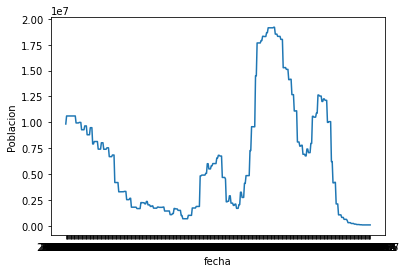

In [16]:
sbn.lineplot(x='fecha', y='Poblacion', data=t)

In [17]:
t.loc[t['Poblacion'] == t.max()[0]]
# con la funcion loc obtengo las fechas donde el numero de personas en cuarentena en todo el pais alcanzo su valor maximo,
# el que fue de 19.191.466 personas en las fechas 17 y 18 Abril del año 2021.

,Poblacion
fecha,
2021-04-17,19191466
2021-04-18,19191466


In [18]:
paspobr1=paspobr[(paspobr['codigo_region']==1)]
paspobr2=paspobr[(paspobr['codigo_region']==2)]
paspobr3=paspobr[(paspobr['codigo_region']==3)]
paspobr4=paspobr[(paspobr['codigo_region']==4)]
paspobr5=paspobr[(paspobr['codigo_region']==5)]
paspobr6=paspobr[(paspobr['codigo_region']==6)]
paspobr7=paspobr[(paspobr['codigo_region']==7)]
paspobr8=paspobr[(paspobr['codigo_region']==8)]
paspobr9=paspobr[(paspobr['codigo_region']==9)]
paspobr10=paspobr[(paspobr['codigo_region']==10)]
paspobr11=paspobr[(paspobr['codigo_region']==11)]
paspobr12=paspobr[(paspobr['codigo_region']==12)]
paspobr13=paspobr[(paspobr['codigo_region']==13)]
paspobr14=paspobr[(paspobr['codigo_region']==14)]
paspobr15=paspobr[(paspobr['codigo_region']==15)]
paspobr16=paspobr[(paspobr['codigo_region']==16)]
# poblacion y fechas separadas por region

In [19]:
paspobr1.drop('codigo_region', axis=1, inplace=True)
paspobr2.drop('codigo_region', axis=1, inplace=True)
paspobr3.drop('codigo_region', axis=1, inplace=True)
paspobr4.drop('codigo_region', axis=1, inplace=True)
paspobr5.drop('codigo_region', axis=1, inplace=True)
paspobr6.drop('codigo_region', axis=1, inplace=True)
paspobr7.drop('codigo_region', axis=1, inplace=True)
paspobr8.drop('codigo_region', axis=1, inplace=True)
paspobr9.drop('codigo_region', axis=1, inplace=True)
paspobr10.drop('codigo_region', axis=1, inplace=True)
paspobr11.drop('codigo_region', axis=1, inplace=True)
paspobr12.drop('codigo_region', axis=1, inplace=True)
paspobr13.drop('codigo_region', axis=1, inplace=True)
paspobr14.drop('codigo_region', axis=1, inplace=True)
paspobr15.drop('codigo_region', axis=1, inplace=True)
paspobr16.drop('codigo_region', axis=1, inplace=True)

C:\Users\juanc\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

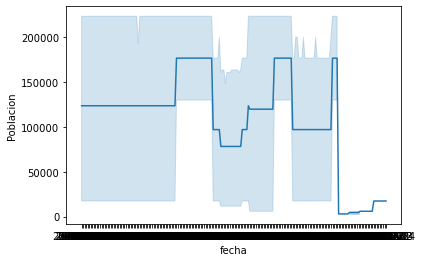

In [20]:
sbn.lineplot(x='fecha', y='Poblacion', data=paspobr1)
# region 1: tarapaca

In [ ]:
sbn.lineplot(x='fecha', y='Poblacion', data=paspobr2)
# region 2: antofagasta

In [ ]:
sbn.lineplot(x='fecha', y='Poblacion', data=paspobr3)
# region 3: atacama

In [ ]:
sbn.lineplot(x='fecha', y='Poblacion', data=paspobr4)
# region 4: coquimbo

In [ ]:
sbn.lineplot(x='fecha', y='Poblacion', data=paspobr5)
# region 5: valparaiso 

In [ ]:
sbn.lineplot(x='fecha', y='Poblacion', data=paspobr6)
# region 6: ohiggins

In [ ]:
sbn.lineplot(x='fecha', y='Poblacion', data=paspobr7)
# region 7: el maule

In [ ]:
sbn.lineplot(x='fecha', y='Poblacion', data=paspobr8)
# region 8: el bio bio

In [ ]:
sbn.lineplot(x='fecha', y='Poblacion', data=paspobr9)
# region 9: la araucania

In [ ]:
sbn.lineplot(x='fecha', y='Poblacion', data=paspobr10)
 # region 10: los lagos

In [ ]:
sbn.lineplot(x='fecha', y='Poblacion', data=paspobr11)
# region 11: aysen

In [ ]:
sbn.lineplot(x='fecha', y='Poblacion', data=paspobr12)
#region 12: magallanes y antartica chilena

In [ ]:
sbn.lineplot(x='fecha', y='Poblacion', data=paspobr13)
# region 13: metropolitana de santiago

In [ ]:
sbn.lineplot(x='fecha', y='Poblacion', data=paspobr14)
# region 14: los rios

In [ ]:
sbn.lineplot(x='fecha', y='Poblacion', data=paspobr15)
# region 15: arica y parinacota

In [ ]:
sbn.lineplot(x='fecha', y='Poblacion', data=paspobr16)
# region 16: ñuble

In [ ]:
r1=paspobr1.groupby(['fecha']).sum()
r2=paspobr2.groupby(['fecha']).sum() 
r3=paspobr3.groupby(['fecha']).sum() 
r4=paspobr4.groupby(['fecha']).sum() 
r5=paspobr5.groupby(['fecha']).sum() 
r6=paspobr6.groupby(['fecha']).sum() 
r7=paspobr7.groupby(['fecha']).sum() 
r8=paspobr8.groupby(['fecha']).sum() 
r9=paspobr9.groupby(['fecha']).sum() 
r10=paspobr10.groupby(['fecha']).sum() 
r11=paspobr11.groupby(['fecha']).sum() 
r12=paspobr12.groupby(['fecha']).sum() 
r13=paspobr13.groupby(['fecha']).sum() 
r14=paspobr14.groupby(['fecha']).sum() 
r15=paspobr15.groupby(['fecha']).sum() 
r16=paspobr16.groupby(['fecha']).sum()

In [ ]:
r1

In [ ]:
r1.loc[r1['Poblacion'] == r1.max()[0]]
# R1 tarapaca
# con esto, se obtienen todos los dias donde la region tuvo el maximo valor de personas en cuarentena para cada region

In [ ]:
r2.loc[r2['Poblacion'] == r2.max()[0]]
# R2 antofagasta

In [ ]:
r3.loc[r3['Poblacion'] == r3.max()[0]]
# R3 atacama

In [ ]:
r4.loc[r4['Poblacion'] == r4.max()[0]]
# R4 coquimbo

In [ ]:
r5.loc[r5['Poblacion'] == r5.max()[0]]
# R5 valparaiso

In [ ]:
r6.loc[r6['Poblacion'] == r6.max()[0]]
# R6 ohiggins

In [ ]:
r7.loc[r7['Poblacion'] == r7.max()[0]]
# R7 el maule

In [ ]:
r8.loc[r8['Poblacion'] == r8.max()[0]]
# R8 el bio bio

In [ ]:
r9.loc[r9['Poblacion'] == r9.max()[0]]
# R9 la araucania

In [ ]:
r10.loc[r10['Poblacion'] == r10.max()[0]]
# R10 los lagos

In [ ]:
r11.loc[r11['Poblacion'] == r11.max()[0]]
# R11 aysen

In [ ]:
r12.loc[r12['Poblacion'] == r12.max()[0]]
# R12 magallanes y antartica chilena

In [ ]:
r13.loc[r13['Poblacion'] == r13.max()[0]]
# R13 metropolitana de santiago

In [ ]:
r14.loc[r14['Poblacion'] == r14.max()[0]]
# R14 los rios

In [ ]:
r15.loc[r15['Poblacion'] == r15.max()[0]]
# R15 arica y parinacota

In [ ]:
r16.loc[r16['Poblacion'] == r16.max()[0]]
# R16 ñuble